В этот раз мы поговорим про регуляризацию - метод добавления дополнительных ограничений к условию задачи с целью предотвратить переобучение или скорректировать ее неправильную постановку. Чаще всего, эта информация имеет вид штрафа за сложность модели. Если вы выбрали сложную модель, и при этом у вас недостаточно данных, то легко можно получить итоговую модель, которая хорошо описывает обучающую выборку, но не обобщается на тестовую.


# Начнем с повторения

In [1]:
import pandas as pd
import numpy as np

# ok, here we go again
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Множественная линейная регрессия


$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Каждый $x$ представляет собой отдельный признак и имеет свой собственный коэффициент. В этом случае:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


### Оценка ("обучение") коэффициентов модели


Вообще говоря, коэффициенты оцениваются с использованием **критерия наименьших квадратов**, что означает, что мы находим линию (математически), которая минимизирует **сумму квадратов остатков** (или «сумму квадратов ошибок»):

<img src="images/08_estimating_coefficients.png">

Что изображено на схеме?
- Черные точки - это **наблюдаемые значения** x и y.
- Синяя линия - это наша **линия полученная при минимизации квадратов ошибок**.
- Красные линии - это **остатки**, которые представляют собой расстояния между наблюдаемыми значениями и линией наименьших квадратов.

Как коэффициенты модели соотносятся с линией наименьших квадратов?
- $ \ beta_0 $ - это **точка пересечения** (значение $ y $, когда $ x $ = 0)
- $ \ beta_1 $ - это **наклон** (изменение $ y $, деленное на изменение $ x $)

Вот графическое изображение этих вычислений:

<img src="images/08_slope_intercept.png">

## Нам нужна выборка для тестировния

In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=67)

In [3]:
print(train_data.shape)
train_data.head()

(160, 4)


,TV,Radio,Newspaper,Sales
7,57.5,32.8,23.5,11.8
115,78.2,46.8,34.5,14.6
130,59.6,12.0,43.1,9.7
184,287.6,43.0,71.8,26.2
51,199.8,3.1,34.6,11.4


In [4]:
print(test_data.shape)
test_data.head()

(40, 4)


,TV,Radio,Newspaper,Sales
33,97.2,1.5,30.0,9.6
78,120.5,28.5,14.2,14.2
72,109.8,14.3,31.7,12.4
167,17.9,37.6,21.6,8.0
188,191.1,28.7,18.2,17.3


Нам нужно явно выделить наши признаки и таргет обучения. Давайте напишем несложную функцию и будем ее использовать:

In [5]:
def get_features_and_taget(data, column):
    return data.drop([column], axis=1).to_numpy(), data[column].to_numpy()

In [6]:
X_train, Y_train = get_features_and_taget(train_data, "Sales")
X_test, Y_test = get_features_and_taget(test_data, "Sales")

In [7]:
X_train[:10]

array([[ 57.5,  32.8,  23.5],
       [ 78.2,  46.8,  34.5],
       [ 59.6,  12. ,  43.1],
       [287.6,  43. ,  71.8],
       [199.8,   3.1,  34.6],
       [214.7,  24. ,   4. ],
       [ 67.8,  36.6, 114. ],
       [ 38. ,  40.3,  11.9],
       [ 11.7,  36.9,  45.2],
       [199.8,   2.6,  21.2]])

In [8]:
Y_train[:10]

array([11.8, 14.6,  9.7, 26.2, 11.4, 17.4, 12.5, 10.9,  7.3, 10.6])

Обучим линейную регрессию с помощью sklearn:

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Посмотрим на ее качество:

In [10]:
Y_train_prediced = model.predict(X_train)
Y_test_prediced = model.predict(X_test)

from sklearn.metrics import r2_score

print("Train R-squared", r2_score(Y_train_prediced, Y_train))
print("Test R-squared", r2_score(Y_test_prediced, Y_test))

Train R-squared 0.8881930192615449
Test R-squared 0.8846897153845468


Часто, чтобы выша модель могла давать лучшие прогнозы, вам нужно добавить больше фичей, которые могли бы учесть некоторые зависимости в ваших данных. Например, добавив квадрат переменной TV, мы сможем учесть часть нелинейной зависимости:

In [11]:
data = pd.read_csv('Advertising.csv', index_col=0)

data["TV_2"] = np.power(data["TV"], 2)

train_data, test_data = train_test_split(data, test_size=0.5, random_state=67)


X_train, Y_train = get_features_and_taget(train_data, "Sales")
X_test, Y_test = get_features_and_taget(test_data, "Sales")

model = LinearRegression()
model.fit(X_train, Y_train)


Y_train_prediced = model.predict(X_train)
Y_test_prediced = model.predict(X_test)

print("Train R-squared", r2_score(Y_train_prediced, Y_train))
print("Test R-squared", r2_score(Y_test_prediced, Y_test))

Train R-squared 0.9245602310435502
Test R-squared 0.8910415134867758


Кажется, стало лучше. Так чего мелочиться, давайте напишем много фичей в цикле:

In [12]:
data = pd.read_csv('Advertising.csv', index_col=0)

from sklearn.preprocessing import scale

for i in range(3, 10):
    # we use scale to avoid numerical problems. Use values less then 20
    data[f"TV_{i}"] = np.power(scale(data["TV"]), i)
    data[f"Radio_{i}"] = np.power(scale(data["Radio"]), i)
    data[f"Newspaper_{i}"] = np.power(scale(data["Newspaper"]), i)
    
data

,TV,Radio,Newspaper,Sales,TV_3,Radio_3,Newspaper_3,TV_4,Radio_4,Newspaper_4,...,Newspaper_6,TV_7,Radio_7,Newspaper_7,TV_8,Radio_8,Newspaper_8,TV_9,Radio_9,Newspaper_9
1,230.1,37.8,69.2,22.1,0.912256,0.945585,5.629734,0.884754,0.928113,10.014990,...,31.693909,8.071218e-01,0.877610,56.381736,7.827889e-01,0.861394,100.300034,7.591896e-01,0.845478,178.428291
2,44.5,39.3,45.1,10.4,-1.716690,1.269563,0.300196,2.055524,1.374692,0.201005,...,0.090118,-3.528697e+00,1.745258,0.060341,4.225178e+00,1.889779,0.040403,-5.059128e+00,2.046268,0.027053
3,17.2,45.9,69.3,9.3,-3.485225,3.570796,5.673550,5.284141,5.457831,10.119052,...,32.189169,-1.841642e+01,19.488801,57.410948,2.792215e+01,29.787918,102.395219,-4.233430e+01,45.529739,182.626854
4,151.5,41.3,58.5,18.5,0.000141,1.806287,2.128792,0.000007,2.199795,2.738489,...,4.531755,1.034967e-09,3.973461,5.829673,5.386971e-11,4.839099,7.499321,2.803901e-12,5.893320,9.647164
5,180.8,10.8,58.4,12.9,0.061248,-0.596126,2.106021,0.024143,0.501708,2.699502,...,4.435325,1.478697e-03,-0.299081,5.685208,5.828758e-04,0.251711,7.287310,2.297593e-04,-0.211843,9.340887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,-2.052937,-2.305361,-0.458701,2.609161,3.045453,0.353758,...,0.210407,-5.356445e+00,-7.020870,-0.162269,6.807724e+00,9.274786,0.125145,-8.652212e+00,-12.252279,-0.096514
197,94.2,4.9,8.1,9.7,-0.234926,-1.906636,-1.104219,0.144957,2.364234,1.141319,...,1.219301,-3.405419e-02,-4.507734,-1.260267,2.101264e-02,5.589603,1.302610,-1.296554e-02,-6.931122,-1.346376
198,177.0,9.3,6.4,12.8,0.042805,-0.838292,-1.374490,0.014974,0.790425,1.528230,...,1.889222,6.409529e-04,-0.662607,-2.100536,2.242118e-04,0.624772,2.335486,7.843153e-05,-0.589097,-2.596715
199,283.6,42.0,66.2,25.5,4.054403,2.024868,4.417806,6.465009,2.561703,7.248958,...,19.517012,2.621175e+01,5.187110,32.024490,4.179634e+01,6.562324,52.547385,6.664700e+01,8.302137,86.222378


In [13]:
train_data, test_data = train_test_split(data, test_size=0.5, random_state=67)


X_train, Y_train = get_features_and_taget(train_data, "Sales")
X_test, Y_test = get_features_and_taget(test_data, "Sales")

model = LinearRegression()
model.fit(X_train, Y_train)


Y_train_prediced = model.predict(X_train)
Y_test_prediced = model.predict(X_test)

print("Train R-squared", r2_score(Y_train_prediced, Y_train))
print("Test R-squared", r2_score(Y_test_prediced, Y_test))

Train R-squared 0.9480301794050353
Test R-squared 0.8019777848237348


Как можно видеть, качество модели ($R^2$) падает на тесте, а на трейне растет. Это называется **переобучение**

![](https://miro.medium.com/max/875/1*_7OPgojau8hkiPUiHoGK_w.png)

**Optional**: Засуньте все выше в цикл и нарисуйте (import matplotlib.pyplot as plt) линии для трейна и теста с разными уровнями степени, а мы идем дальше. 

### Bias-variance tradeoff

Здесь стоит упомянуть про баланс между смещением и отклонением (переобучение и недообучение модели). Чтобы понять, что это, рассмотрим следующие определения и изображения ниже:

* **Bias** (смещение) - это систематическая ошибка прогноза. Ключевым словом является **систематическая** ошибка (в наклоне **k**), а не локальная ошибка (остатки **y**). Вы можете думать о **bias** как о точности прогнозов, по сути, это матожидание разности между истинным ответом и выданным алгоритмом.
* **Variance** (разброс) - мера разброса нашего вектора весов оценок.

Таким образом, разброс характеризует разнообразие алгоритмов (из-за случайности обучающей выборки, в том числе шума, и стохастической природы настройки), а смещение – способность модели алгоритмов настраиваться на целевую зависимость. 


![](https://alexanderdyakonov.files.wordpress.com/2018/04/bv_all.jpg)
![](http://www.ebc.cat/wp-content/uploads/2017/02/right_fited_model-1024x623.png)

# House prices

Воспользуемся набором данных с признаками по недвижимости для предсказания ее стоимости с Kaggle: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Данные заранее разделены на обучающую (train) и тестовую (test) выборки. 

На самом деле, выше, когда мы говорили про трейн и тест, мы немного упрощали картину мира. Вообще говоря, тест, обычно, - это наша с вами жизнь, а в случае соревнования он нам просто недоступен. Также, правильнее выделять 3 типа выборок: тренировочную, валидационную и тестовую.

In [14]:
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
print(f'Размер train: {train.shape}')
print(f'Размер test: {test.shape}')

Размер train: (1460, 80)
Размер test: (1459, 79)


В test количество колонок меньше на 1:

In [15]:
set(list(train.columns)) - set(list(test.columns))

{'SalePrice'}

Так как в данном случае таргет мы имеем только для трейна, работать будем только с ним.

SalePrice - наша таргетная (целевая) переменная. Полное описание всех 79 признаков в данных доступно в файле ```data_description.txt``` либо можно посмотреть на [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Работа с данными

### Чтобы улучшить качествоваших прогнозов можно немного пошаманить (optional):

1. Найти и удалить выбросы
2. Заполнить пропущенные значения
3. Придумать фичи

### 1. Удаляем выбросы

Покажем этот шаг на примере с одним признаком - жилой площадью. То же самое можно проделать по остальным признакам.   

Значение z-score +/- 3 обычно рассматривается как выброс. Ну, или на глаз :)

In [16]:
train.shape[0]

1460

In [17]:
from scipy import stats

z_scores = stats.zscore(train['GrLivArea'])
train['z_score'] = np.abs(z_scores)
print('Было 1460, осталось', train[train.z_score < 3].shape[0], 'наблюдения')

Было 1460, осталось 1444 наблюдения


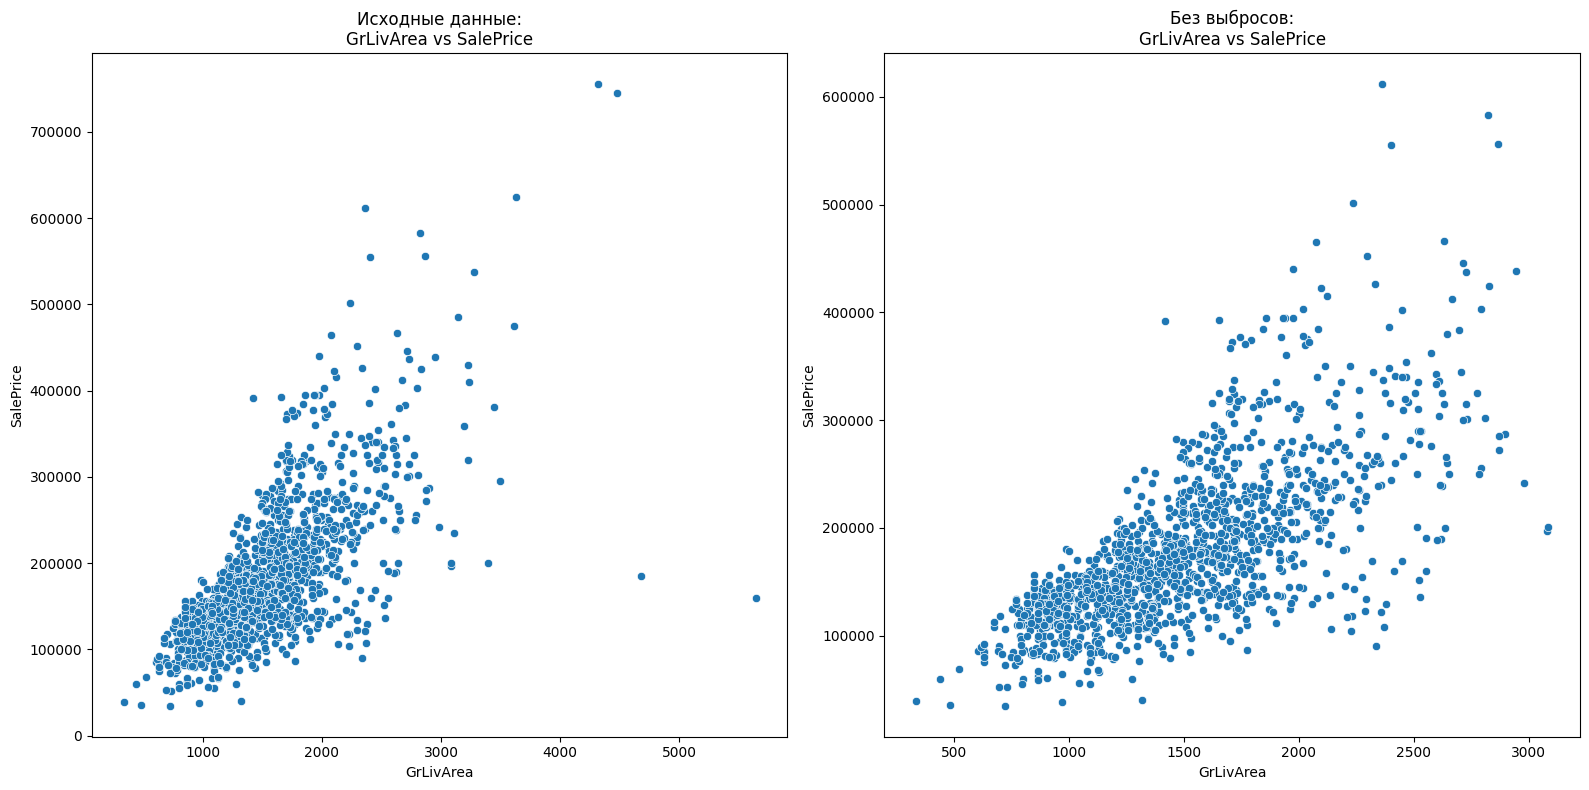

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Исходные данные:\nGrLivArea vs SalePrice')

plt.subplot(1, 2, 2)
sns.scatterplot(x=train[train.z_score < 3]['GrLivArea'], y=train['SalePrice'])
plt.title('Без выбросов:\nGrLivArea vs SalePrice')
plt.tight_layout()

In [19]:
train = train[train.z_score < 3]
train.drop(columns='z_score', inplace=True)

### 2. Посмотрим наличие пропущенных значений

In [20]:
train.isnull().sum()[train.isnull().sum()!=0]

LotFrontage      257
Alley           1354
MasVnrType       864
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        80
GarageYrBlt       80
GarageFinish      80
GarageQual        80
GarageCond        80
PoolQC          1440
Fence           1167
MiscFeature     1390
dtype: int64

Колонок слишком много, можем обернуть результат в словарь и отсортировать по количеству пропусков по убыванию. 

In [21]:
sorted(dict(train.isnull().sum()).items(), key=lambda x: x[1], reverse=True)[:20]

[('PoolQC', 1440),
 ('MiscFeature', 1390),
 ('Alley', 1354),
 ('Fence', 1167),
 ('MasVnrType', 864),
 ('FireplaceQu', 689),
 ('LotFrontage', 257),
 ('GarageType', 80),
 ('GarageYrBlt', 80),
 ('GarageFinish', 80),
 ('GarageQual', 80),
 ('GarageCond', 80),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrArea', 8),
 ('Electrical', 1),
 ('MSSubClass', 0)]

Взглянем на описание данных из документации, где рекомендованы разные стратегии по заполнению пропущенных значений:

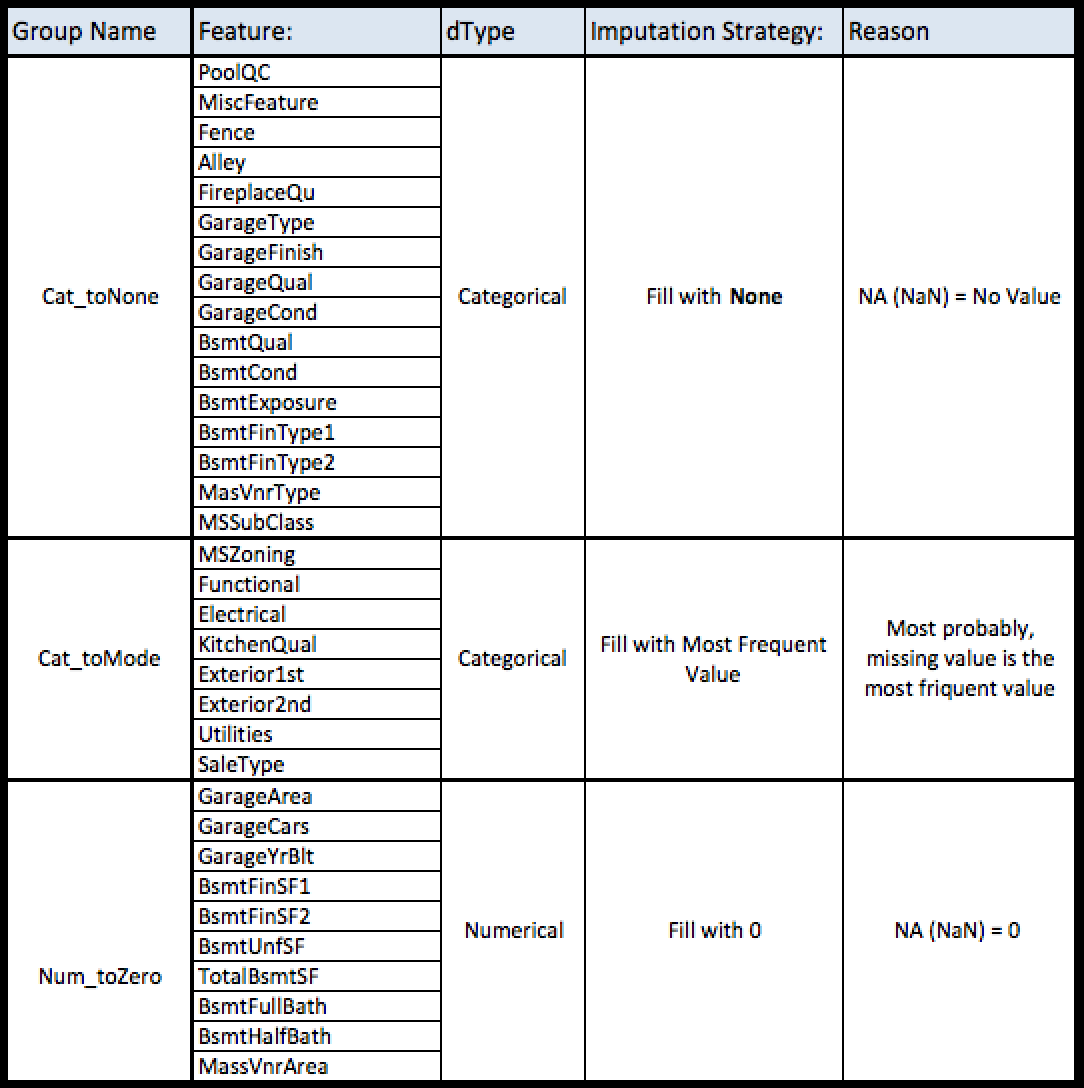

In [22]:
from IPython.display import Image
Image("./data/data_desc.png", height=800 , width=600)

Заполним пропущенные значения в соответствии со стратегиями выше:

In [23]:
cat_to_none = ('PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu', 'GarageType', 'GarageFinish',
              'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinType2', 'MasVnrType', 'MSSubClass')
    
cat_to_mode = ('MSZoning', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
              'Utilities', 'SaleType')

num_to_zero = ('GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'MasVnrArea')

for col in cat_to_none:
    train[col] = train[col].fillna('None')

for col in cat_to_mode:
    train[col] = train[col].fillna(train[col].mode()[0])
    
for col in num_to_zero:
    train[col] = train[col].fillna(0)


* По переменной **LotFrontage** нужен дополнительный анализ

Поскольку LotFrontage - это расстояние до двора дома, мы можем сделать предположение, что оно зависит от района, в котором расположен дом. Таким образом, мы можем сгруппировать значения LotFrontage по признаку соседства и заменить отсутствующие значения на медианное расстояние LotFrontage по соседству.

In [24]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### 3. Добавим фичи

![](https://i.pinimg.com/originals/80/b2/fe/80b2febe7af2b92dd3e8565110d507e7.jpg)

Для примера:
* Пусть Total_SF будет общий метраж дома.

In [25]:
train['Total_SF'] = (train['1stFlrSF'] + train['2ndFlrSF'] + 
                       + train['TotalBsmtSF'] + train['GarageArea'] + 
                       + train['GrLivArea'] + train['PoolArea'] + train['WoodDeckSF'])

Вот Вы написали уже свою первую "фичу", как настоящий машинлернер.

P.S.: Осталось только выучить машинное обучение, чтобы понять, что в линейной регрессии данная фича не имеет пользы.

In [26]:
# HUGE tonn of features can be written here

И еще: нужно сделать дамми переменные, потому что у нас куча категориальных признаков.

In [27]:
train = pd.get_dummies(train)
train.shape

(1444, 302)

## Ridge и Lasso


Начнем с обучения простой регрессии. Копипастнем код с прошлого датасета.

In [28]:
train_data, test_data = train_test_split(train, test_size=0.5, random_state=67)

from sklearn.linear_model import ElasticNet, Lasso, Ridge, RidgeCV, LassoCV

X_train, Y_train = get_features_and_taget(train_data, "SalePrice")
X_test, Y_test = get_features_and_taget(test_data, "SalePrice")

model = LinearRegression()
model.fit(X_train, Y_train)


Y_train_prediced = model.predict(X_train)
Y_test_prediced = model.predict(X_test)

print("Train R-squared", r2_score(Y_train_prediced, Y_train))
print("Test R-squared", r2_score(Y_test_prediced, Y_test))

Train R-squared 0.9554338949809885
Test R-squared 0.8601855350839263


А теперь давайте подумаем. **Что, если у нас и так уже есть переобучение?**

Можем ли мы как-то избежать его? Какие есть варианты? Есть ли общий подход? Есть!


Обозначения:

* $X$ - входные переменные (признаки)
* $w$ - вектор весов. В простом однофакторном линейном уравнении это был наш коэффициент наклона. Мы пытаемся оценить наш вектор весов $w$ с помощью регрессии.
* $y$ - значение целевой переменной. Оно равно скалярному произведению $w\cdot X$. Оценка целевой переменной обозначается как $\hat y$ 
* $\lambda$ - гиперпараметр, определяющий силу штрафа.

Чтобы повысить точность и обобщающую способность наших моделей, мы будем использовать регуляризацию (L1 или L2) в нашем уравнении регрессии. Регуляризация позволяет увеличить смещение и снизить разброс модели за счет увеличения значения штрафа - гиперпараметра $\lambda$. 

* **Ridge (гребневая) регрессия:**

Модель с штрафом L2, где к функции потерь МНК добавляется сумма весов в квадрате. При увеличении гиперпараметра $\lambda$б гребневая регрессия добавляет в модель больше смещения, поэтому качество обучения на train будет не лучшим, но при этом постепенно достигается сокращение переобучения на тестовых данных. Гребневая регрессия минимизирует (за счет штрафа) вес нерелевантных признаков, но не зануляет их. Эта модель применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии.

$\sum_{i=1}^{n}(y_i - \hat y_i)^2 + \lambda||w||^2$

* **Lasso регрессия**:

Модель со штрафом L1, где вместо квадратов в штрафе мы используем модуль. Сила регуляризации также увеличивается с увеличением $\lambda$, однако Lasso, в результате, отбирает признаки, поскольку зануляет веса при нерелевантных. 

$\sum_{i=1}^{n}(y_i - \hat y_i)^2 + \lambda||w||$

* **Регрессия ElasticNet**: 

Это модель со штрафами $L2 + L1$, где  к функции потерь добавлены оба параметра регуляризации. Эта модель была введена для ограничения иногда неточного отбора признаков Lasso, когда релевантные признаки обнуляются. Добавление штрафа $L2$ в модель увеличивает шансы на сохранение важных признаков. Обычно в определении ElasticNet необходимо указывать соотношение $\frac{L1}{L2}$, но чаще всего берут отношение $0.5$.

$\sum_{i=1}^{n}(y_i - \hat y_i)^2 + \lambda_{1}||w||^2 + \lambda_{2}||w||$



Давайте заиспользуем же готовые модули! Но, **тут важно приводить все признаки к одному масштабу**

In [29]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

train_data, test_data = train_test_split(train, test_size=0.5, random_state=67)

X_train, Y_train = get_features_and_taget(train_data, "SalePrice")
X_test, Y_test = get_features_and_taget(test_data, "SalePrice")

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)


# We scale target just for more "usual" alpha values
scaler_y = StandardScaler()
Y_train = scaler_y.fit_transform(Y_train.reshape((-1,1))).reshape(-1)
Y_test = scaler_y.transform(Y_test.reshape((-1,1))).reshape(-1)

model = Lasso(alpha=0.01) # just change me to any other model
model.fit(X_train, Y_train)


Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

print("Train R-squared", r2_score(Y_train_predicted, Y_train))
print("Test R-squared", r2_score(Y_test_predicted, Y_test))

Train R-squared 0.9359929209408474
Test R-squared 0.8801520093500159


Стало лучше, а давайте подберем оптимальный параметр альфы!

  0%|          | 0/20 [00:00<?, ?it/s]

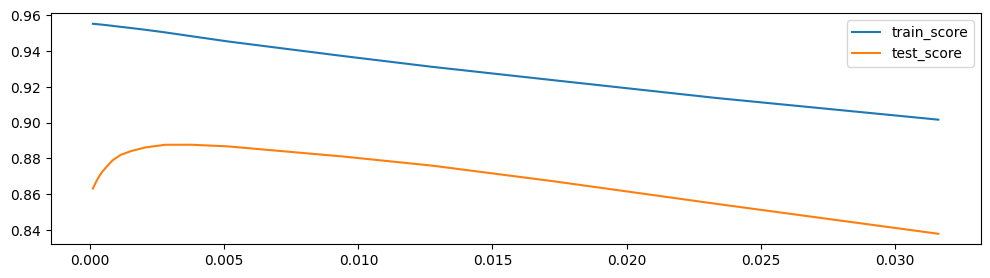

In [30]:
runs = []

from tqdm import tqdm_notebook

for alpha in tqdm_notebook(np.logspace(-4, -1.5, 20)):

    model = Lasso(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_test)

#     print("Alpha", alpha)
#     print("Train R-squared", r2_score(Y_train_prediced, Y_train))
#     print("Test R-squared", r2_score(Y_test_prediced, Y_test))
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_test),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["train_score"] for run in runs], label="train_score")
plt.plot([run["alpha"] for run in runs], [run["test_score"] for run in runs], label="test_score")
plt.legend()
plt.show()


Теперь посмотрим, как меняются коэффициенты при разных уровнях альфы, для ридж (np.logspace(-2, 5, 20)) и для лассо (np.logspace(-2, 0.2, 20)):



  0%|          | 0/20 [00:00<?, ?it/s]

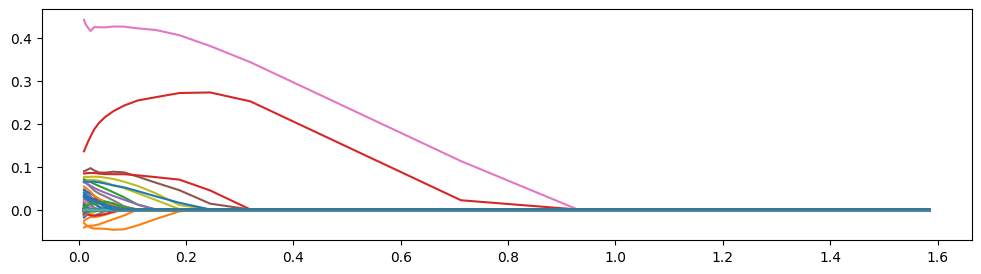

In [31]:
runs = []

from tqdm import tqdm_notebook

for alpha in tqdm_notebook(np.logspace(-2, 0.2, 20)):

    model = Lasso(alpha=alpha) # change me between Ridge and Lasso
    model.fit(X_train, Y_train)

    Y_train_prediced = model.predict(X_train)
    Y_test_prediced = model.predict(X_test)

#     print("Alpha", alpha)
#     print("Train R-squared", r2_score(Y_train_prediced, Y_train))
#     print("Test R-squared", r2_score(Y_test_prediced, Y_test))
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "train_score": r2_score(Y_train_prediced, Y_train),
        "test_score": r2_score(Y_test_prediced, Y_test),
    })


plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["coef"] for run in runs])
plt.show()

Материал для отличников: (optional)

Почему так? Это не случайно!

![](https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png)

### Еще немного визуализации

Давайте постоим график лассо или ридж регрессии, с один предиктором

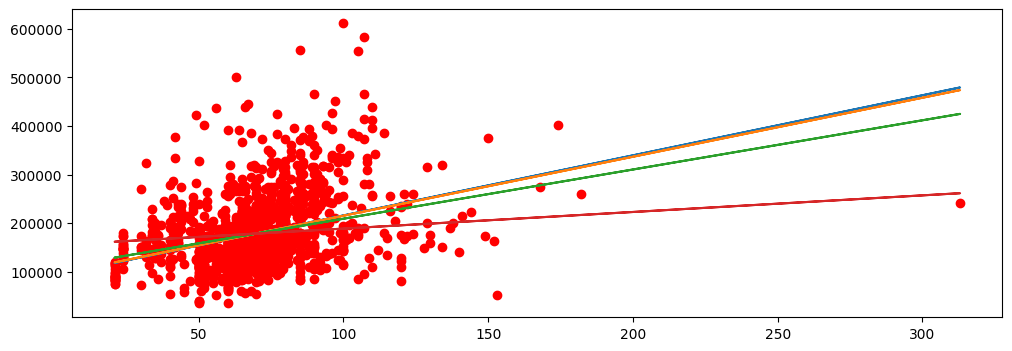

In [32]:
FEATURE_INDEX = 1

X, Y = get_features_and_taget(train, "SalePrice")

X = X[:, [FEATURE_INDEX]]

plt.figure(figsize=(12, 4))
plt.scatter(X, Y, color = "red")
for alpha in [0.1, 10000, 100000, 400000]: 
    model = Lasso(alpha=alpha)
    model.fit(X, Y)
    plt.plot(X, model.predict(X))

plt.show()


## 3. Кросс-валидация
 
 
Предположим, мы подобрали оптимальный параметр. **А чтоб если мы бы разбили выборку по-другому?** Получился бы у нас другой оптимальный параметр? А давайте разобьем по-разному и подберем оптимальный параметр в среднем!

**Кросс-валидация** (или скользящий контроль) — это процедура оценивания обобщающей способности модели, она бывает нескольких видов. Валидация на отложенных данных (**Hold-Out Validation**) - это когда мы один раз случайным образом делим выборку на train и test. 
Сегодня мы попробуем другой вид - **k-fold кросс-валидация**. 

1. Обучающая выборка разбивается на k непересекающихся одинаковых по объему частей;<br>
2. Производится k итераций. На каждой итерации происходит следующее: <br>
    2.1 Модель обучается на k−1 части обучающей выборки; <br>
    2.2 Модель тестируется на части обучающей выборки, которая не участвовала в обучении.<br>

Каждая из k частей единожды используется для тестирования. Как правило, k=10 (5 в случае малого размера выборки).

![](https://long-short.pro/wp-content/uploads/sites/3/2013/06/crossvalidation.png)

In [33]:
from sklearn.model_selection import cross_validate

model = Lasso(alpha=1)
cv_results = cross_validate(model, X_train, Y_train, cv=4)
cv_results

{'fit_time': array([0.00217247, 0.00224757, 0.00247812, 0.00198412]),
 'score_time': array([0.00053906, 0.00046992, 0.00055122, 0.00040174]),
 'test_score': array([-7.58575379e-05, -5.11013074e-03, -6.46638291e-05, -8.65827625e-03])}

In [34]:
runs = []

from tqdm import tqdm_notebook

X, Y = get_features_and_taget(train, "SalePrice")

for alpha in tqdm_notebook(np.logspace(-4, -1.5, 20)):

    model = Lasso(alpha=alpha) # change me between Ridge and Lasso
    cv_results = cross_validate(model, X, Y, cv=4)

    print("Alpha", alpha)
    print("Test Score", cv_results['test_score'].mean())


  0%|          | 0/20 [00:00<?, ?it/s]

Alpha 9.999999999999999e-05
Test Score 0.8953380104260049
Alpha 0.00013538761800225446
Test Score 0.8953394734035277
Alpha 0.00018329807108324357
Test Score 0.8953414428458275
Alpha 0.0002481628922836826
Test Score 0.895344102375515
Alpha 0.0003359818286283781
Test Score 0.8953476915464649
Alpha 0.00045487779470037773
Test Score 0.8953525309990588
Alpha 0.0006158482110660266
Test Score 0.8953590606617591
Alpha 0.0008337822234717891
Test Score 0.8953678356508536
Alpha 0.0011288378916846883
Test Score 0.8953796948625709
Alpha 0.0015283067326587686
Test Score 0.8953962114313389
Alpha 0.00206913808111479
Test Score 0.8954198088215362
Alpha 0.0028013567611988675
Test Score 0.8954531306713575
Alpha 0.00379269019073225
Test Score 0.8954973080080757
Alpha 0.005134832907437549
Test Score 0.8955569364562139
Alpha 0.0069519279617756054
Test Score 0.8956388552538032
Alpha 0.00941204967268067
Test Score 0.8957459675838797
Alpha 0.012742749857031334
Test Score 0.8958833892000868
Alpha 0.017252105499